本次作业以垃圾邮件分类任务为基础，要求提取文本特征并使用朴素贝叶斯算法进行垃圾邮件识别（调用已有工具包或自行实现）。

### 任务介绍
电子邮件是互联网的一项重要服务，在大家的学习、工作和生活中会广泛使用。但是大家的邮箱常常被各种各样的垃圾邮件填充了。有统计显示，每天互联网上产生的垃圾邮件有几百亿近千亿的量级。因此，对电子邮件服务提供商来说，垃圾邮件过滤是一项重要功能。而朴素贝叶斯算法在垃圾邮件识别任务上一直表现非常好，至今仍然有很多系统在使用朴素贝叶斯算法作为基本的垃圾邮件识别算法。

本次实验数据集来自[Trec06](https://plg.uwaterloo.ca/cgi-bin/cgiwrap/gvcormac/foo06)的中文垃圾邮件数据集，目录解压后包含三个文件夹，其中data目录下是所有的邮件（未分词），已分词好的邮件在data_cut目录下。邮件分为邮件头部分和正文部分，两部分之间一般有空行隔开。标签数据在label文件夹下，文件中每行是标签和对应的邮件路径。‘spam’表示垃圾邮件，‘ham’表示正常邮件。

本次实验

基本要求：
1. 提取正文部分的文本特征；
2. 划分训练集和测试集（可以借助工具包。一般笔记本就足够运行所有数据，认为实现困难或算力不够的同学可以采样一部分数据进行实验。）；
3. 使用朴素贝叶斯算法完成垃圾邮件的分类与预测，要求测试集准确率Accuracy、精准率Precision、召回率Recall均高于0.9（本次实验可以使用已有的一些工具包完成如sklearn）；
4. 对比特征数目（词表大小）对模型效果的影响；
5. 提交代码和实验报告。

扩展要求：
1. 邮件头信息有时也可以协助判断垃圾邮件，欢迎学有余力的同学们尝试；
2. 尝试自行实现朴素贝叶斯算法细节；
3. 尝试对比不同的概率计算方法。

### 导入工具包

In [17]:
'''
提示：
若调用已有工具包，sklearn中提供了一些可能会用到的类。
'''
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # 提取文本特征向量的类
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB # 三种朴素贝叶斯算法，差别在于估计p(x|y)的方式
from sklearn.model_selection import train_test_split # 分割数据集

In [18]:
import pandas as pd
# 读取标签索引
# 读取label文件
indexData = pd.read_csv('trec06c-utf8/label/index', sep=' ', header=None, names=['label', 'path'])
indexData.path = indexData.path.map(lambda x: x.replace('../data', './trec06c-utf8/data_cut'))
# indexData
indexData['text'] = indexData.path.map(lambda x: open(x, 'r', encoding='utf-8').read())

In [19]:
indexData['content'] = indexData.text.map(lambda x: x.split('\n\n',1)[1])
indexData.head()


,label,path,text,content
0,spam,./trec06c-utf8/data_cut/000/000,Received: from hp-5e1fe6310264 ([218.79.188.13...,[ 课 程 背 景 ]\n\n \n每 一位 管理 和 技术人员 都 清楚 地 ...
1,ham,./trec06c-utf8/data_cut/000/001,Received: from jdl.ac.cn ([159.226.42.8])\n\tb...,讲 的 是 孔子 后人 的 故事 。 一个 老 领导 回到 家乡 ， 跟 儿子 感情 不 和...
2,spam,./trec06c-utf8/data_cut/000/002,Received: from 163.con ([61.141.165.252])\n\tb...,尊敬 的 贵 公司 ( 财务 / 经理 ) 负责人 您好 ！\n我 是 深圳 金海 实业 有...
3,spam,./trec06c-utf8/data_cut/000/003,Received: from 12.com ([222.50.6.150])\n\tby s...,贵 公司 负责人 ( 经理 / 财务 ） 您好 ：\n深圳市 华龙 公司 受 多家 公司 委...
4,spam,./trec06c-utf8/data_cut/000/004,Received: from dghhkjk.com ([59.36.183.208])\n...,这是 一封 HTML 格式 信件 ！\n\n- - - - - - - - - - - - ...


In [20]:
def train_test_model(max_features=None):
    # 分割数据集
    # 特征提取
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(indexData['content'])
    # print(X)
    Y = indexData['label']
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.2, random_state=20250620)
    print(train_data.shape, test_data.shape, train_label.shape, test_label.shape)
    clf = MultinomialNB()
    clf.fit(train_data, train_label)
    # 预测
    y_pred = clf.predict(test_data)
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    # accuracy
    accuracy = accuracy_score(test_label, y_pred)
    print(f'accuracy({max_features}): {accuracy}')
    # precision
    precision = precision_score(test_label, y_pred, pos_label='spam')
    print(f'precision({max_features}): {precision}')
    # recall
    recall = recall_score(test_label, y_pred, pos_label='spam')
    print(f'recall({max_features}): {recall}')
    return (max_features, accuracy, precision, recall)

In [21]:
train_test_model()

(51696, 196902) (12924, 196902) (51696,) (12924,)
accuracy(None): 0.9804240173320953
precision(None): 0.9809380776340111
recall(None): 0.9897423942184403


(None, 0.9804240173320953, 0.9809380776340111, 0.9897423942184403)

In [22]:
result = [train_test_model(max_features=10**i) for i in range(1,10)]

(51696, 10) (12924, 10) (51696,) (12924,)
accuracy(10): 0.8508975549365522
precision(10): 0.8595675675675676
recall(10): 0.9267979951043245
(51696, 100) (12924, 100) (51696,) (12924,)
accuracy(100): 0.9405756731662024
precision(100): 0.9507212925562608
recall(100): 0.9602517775964564
(51696, 1000) (12924, 1000) (51696,) (12924,)
accuracy(1000): 0.957288765088208
precision(1000): 0.9744650667927651
recall(1000): 0.9608345961067724
(51696, 10000) (12924, 10000) (51696,) (12924,)
accuracy(10000): 0.9675796966883318
precision(10000): 0.9838709677419355
recall(10000): 0.9670124723161208
(51696, 100000) (12924, 100000) (51696,) (12924,)
accuracy(100000): 0.9773290003095016
precision(100000): 0.9837692666978047
recall(100000): 0.9820491898822706
(51696, 196902) (12924, 196902) (51696,) (12924,)
accuracy(1000000): 0.9804240173320953
precision(1000000): 0.9809380776340111
recall(1000000): 0.9897423942184403
(51696, 196902) (12924, 196902) (51696,) (12924,)
accuracy(10000000): 0.9804240173320953

   max_features  accuracy  precision    recall
0            10  0.850898   0.859568  0.926798
1           100  0.940576   0.950721  0.960252
2          1000  0.957289   0.974465  0.960835
3         10000  0.967580   0.983871  0.967012
4        100000  0.977329   0.983769  0.982049
5       1000000  0.980424   0.980938  0.989742
6      10000000  0.980424   0.980938  0.989742
7     100000000  0.980424   0.980938  0.989742
8    1000000000  0.980424   0.980938  0.989742


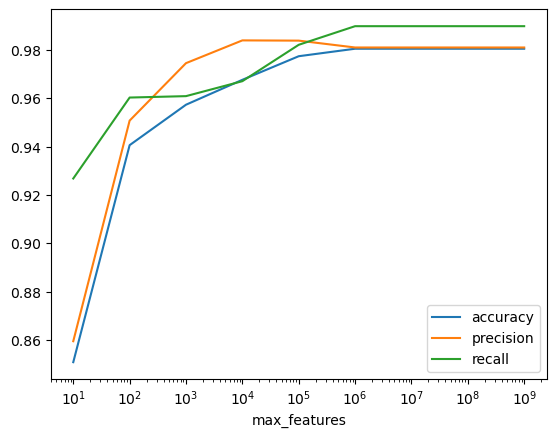

In [23]:
result_df = pd.DataFrame(result, columns=['max_features', 'accuracy', 'precision', 'recall'])
print(result_df)
ax = result_df.plot(x='max_features', y=['accuracy', 'precision', 'recall'], kind='line')
ax.set_xscale('log')


## 实验总结


本次实验是使用朴素贝叶斯算法来完成邮件垃圾分类的功能

### 特征数目对模型效果的影响

- 在特征数目较低(10数量级)的情况下accuracy、precision、recall 较低。
- 随着量级增大10到100逐渐到10^6逐步升高
- 10^6之后继续提高量级后没有明显效果（很大可能没有额外特征，或者确实没有效果了）


### 朴素贝叶斯分类的学习关键知识点总结

- 最基础的概念是贝叶斯公式 $P(h|D)=\frac{P(D|h)\times P(h)}{P(D)}$
- 基于贝叶斯公式确定出了两个假设
  - 极大后验假设（h of MAP）。因为P(D)是确定的，因此$\underset{h}{arg max}P(h|D)=\underset{h}{arg max} P(D|h)\times P(h)$
  - 极大似然假设（h of ML）。因为假设概率未知或者相同。因此$\underset{h}{arg max} P(h|D)=\underset{h}{arg max} P(D|h)$
  - 极大后验假设考虑先验概率。极大似然假设考虑历史经验。

### 朴素贝叶斯分类实验总结

- 通过文件索引将邮件读取转换为DataFrame
- 通过 TfidfVectorizer 对指定邮件特征数量进行向量化
- 通过 MultinomialNB 朴素贝叶斯算法进行训练
- 预测评估模型